In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


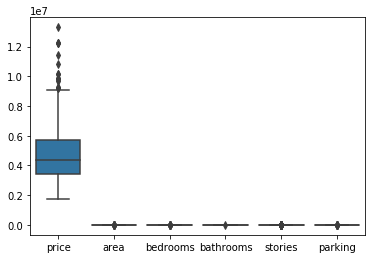

In [5]:
sns.boxplot(data=df)

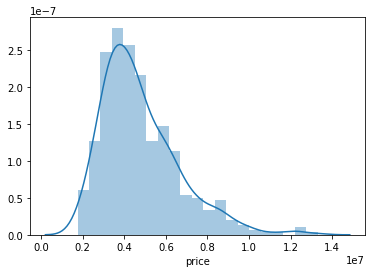

In [6]:
sns.distplot(df['price'])

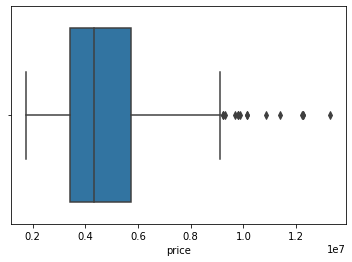

In [7]:
sns.boxplot(df['price'])

In [8]:
df['lprice']=np.log(df['price'])
df['lprice']

0      16.403275
1      16.321036
2      16.321036
3      16.318175
4      16.250001
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: lprice, Length: 545, dtype: float64

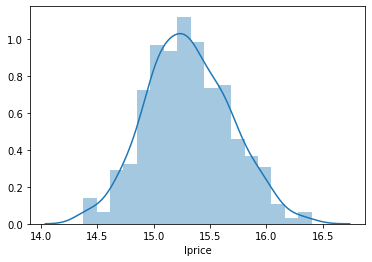

In [9]:
sns.distplot(df['lprice'])

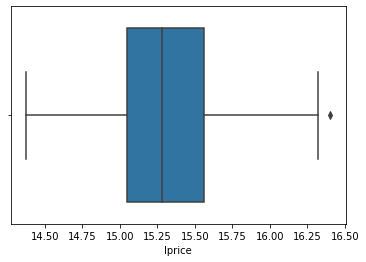

In [10]:
sns.boxplot(df['lprice'])

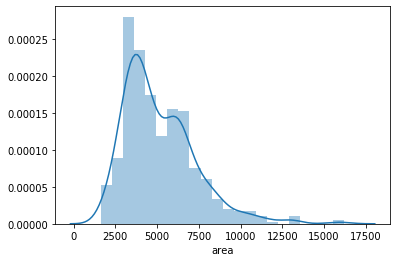

In [11]:
sns.distplot(df['area'])

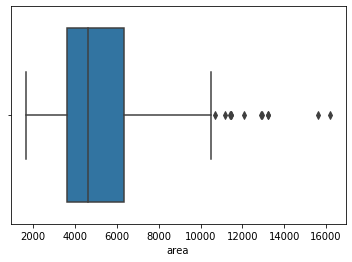

In [12]:
sns.boxplot(df['area'])

In [13]:
q1=df['area'].quantile(0.25)
q3=df['area'].quantile(0.75)
iqr=q3-q1

df=df[(df['area']<(q3+1.5*iqr))]

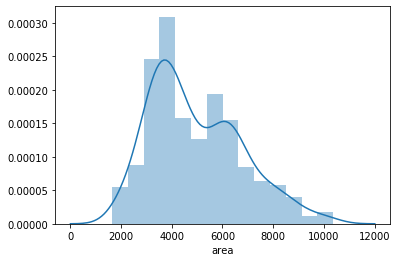

In [14]:
sns.distplot(df['area'])

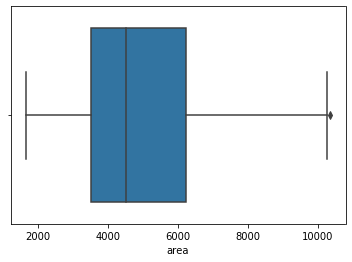

In [15]:
sns.boxplot(df['area'])

In [16]:
df['furnishingstatus'].value_counts()


semi-furnished    221
unfurnished       176
furnished         133
Name: furnishingstatus, dtype: int64

### EDA

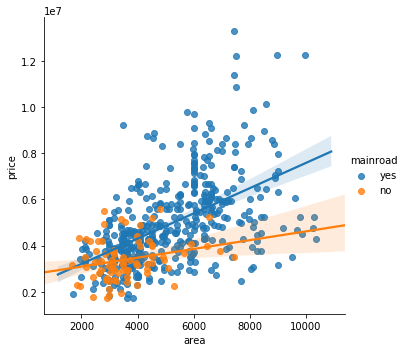

In [28]:
sns.lmplot(x='area',y='price',hue='mainroad',data=df)

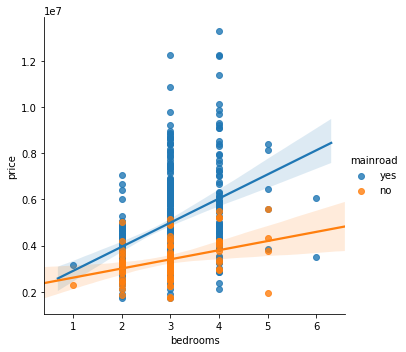

In [29]:
sns.lmplot(x='bedrooms',y='price',hue='mainroad',data=df)

##### price and furnishin status

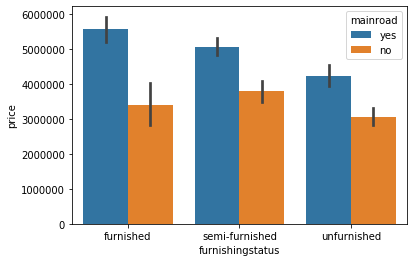

In [35]:
sns.barplot(x='furnishingstatus',y='price',hue='mainroad',data=df)

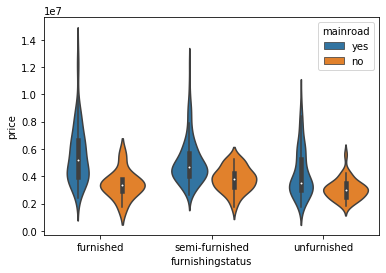

In [33]:
sns.violinplot(x='furnishingstatus',y='price',hue='mainroad',data=df)

In [37]:
df[['bathrooms','stories','parking']]=df[['bathrooms','stories','parking']].astype(object)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


##### we will treat the above variables are object as the range og the above variables were too less

In [38]:
df1=pd.get_dummies(df,drop_first=True)
df1

,price,area,bedrooms,lprice,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,...,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,16.403275,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1,12250000,8960,4,16.321036,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,12250000,9960,3,16.321036,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,12215000,7500,4,16.318175,1,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
4,11410000,7420,4,16.250001,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,14.414347,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
541,1767150,2400,3,14.384879,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,14.375126,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,14.375126,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 544
Data columns (total 21 columns):
price                              530 non-null int64
area                               530 non-null int64
bedrooms                           530 non-null int64
lprice                             530 non-null float64
bathrooms_2                        530 non-null uint8
bathrooms_3                        530 non-null uint8
bathrooms_4                        530 non-null uint8
stories_2                          530 non-null uint8
stories_3                          530 non-null uint8
stories_4                          530 non-null uint8
mainroad_yes                       530 non-null uint8
guestroom_yes                      530 non-null uint8
basement_yes                       530 non-null uint8
hotwaterheating_yes                530 non-null uint8
airconditioning_yes                530 non-null uint8
parking_1                          530 non-null uint8
parking_2                    

In [42]:
X=df1.drop(['price','lprice'],axis=1)
y=df['lprice']
X_constant=X.assign(const=1)


### statistical modeling

In [43]:
import statsmodels.api as sm
import statsmodels.stats

ols=sm.OLS(y,X_constant).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     62.99
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          2.30e-120
Time:                        12:34:44   Log-Likelihood:                 94.782
No. Observations:                 530   AIC:                            -149.6
Df Residuals:                     510   BIC:                            -64.11
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area                              5.48e-05   6.12e-06      8.953      0.000    4.28e-05    6.68e-05
bedrooms                            0.0388      0.015      2.527      0.012       0.009       0.069
bathrooms_2                         0.1613      0.024      6.778      0.000       0.115       0.208
bathrooms_3                         0.2740      0.072      3.825      0.000       0.133       0.415
bathrooms_4                         0.5833      0.219      2.667      0.008       0.154       1.013
stories_2                           0.0577      0.023      2.467      0.014       0.012       0.104
stories_3                           0.1950      0.040      4.867      0.000       0.116       0.274
stories_4                           0.2678      0.042      6.449      0.000       0.186       0.349
mainroad_yes                        0.1126      0.028      4.054      0.000       0.058       0.167
guestroom_yes                       0.0594      0.026      2.277      0.023       0.008       0.111
basement_yes                        0.0951      0.022      4.346      0.000       0.052       0.138
hotwaterheating_yes                 0.1494      0.045      3.354      0.001       0.062       0.237
airconditioning_yes                 0.1634      0.022      7.554      0.000       0.121       0.206
parking_1                           0.0746      0.023      3.185      0.002       0.029       0.121
parking_2                           0.1078      0.026      4.164      0.000       0.057       0.159
parking_3                          -0.0231      0.066     -0.353      0.724      -0.152       0.106
prefarea_yes                        0.1218      0.023      5.250      0.000       0.076       0.167
furnishingstatus_semi-furnished     0.0209      0.023      0.902      0.368      -0.025       0.066
furnishingstatus_unfurnished       -0.1119      0.025     -4.505      0.000      -0.161      -0.063
const                              14.5709      0.054    270.404      0.000      14.465      14.677
==============================================================================
Omnibus:                        3.130   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                3.185
Skew:                          -0.097   Prob(JB):                        0.203
Kurtosis:                       3.327   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 70.1% variation in price is explained by the independent variables

#### F statistic : 6.28*10^-121 is the probability of getting f value greater than 63 when H0 is true. Hence we regect null hypothesis

In [48]:
y=df['price']
X_constant=X.assign(const=1)

In [49]:
ols=sm.OLS(y,X_constant).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     58.28
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          1.74e-114
Time:                        12:51:18   Log-Likelihood:                -8095.1
No. Observations:                 530   AIC:                         1.623e+04
Df Residuals:                     510   BIC:                         1.632e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area                              264.6949     31.464      8.413      0.000     202.880     326.510
bedrooms                         1.543e+05   7.89e+04      1.956      0.051    -681.733    3.09e+05
bathrooms_2                      8.929e+05   1.22e+05      7.298      0.000    6.53e+05    1.13e+06
bathrooms_3                      1.844e+06   3.68e+05      5.007      0.000    1.12e+06    2.57e+06
bathrooms_4                      5.242e+06   1.12e+06      4.663      0.000    3.03e+06    7.45e+06
stories_2                        3.182e+05    1.2e+05      2.648      0.008    8.21e+04    5.54e+05
stories_3                         8.74e+05   2.06e+05      4.245      0.000    4.69e+05    1.28e+06
stories_4                        1.383e+06   2.13e+05      6.479      0.000    9.64e+05     1.8e+06
mainroad_yes                     4.042e+05   1.43e+05      2.832      0.005    1.24e+05    6.85e+05
guestroom_yes                    2.696e+05   1.34e+05      2.010      0.045    6120.337    5.33e+05
basement_yes                     3.624e+05   1.12e+05      3.223      0.001    1.41e+05    5.83e+05
hotwaterheating_yes              8.193e+05   2.29e+05      3.578      0.000    3.69e+05    1.27e+06
airconditioning_yes              8.169e+05   1.11e+05      7.346      0.000    5.98e+05    1.04e+06
parking_1                        3.808e+05    1.2e+05      3.162      0.002    1.44e+05    6.17e+05
parking_2                        6.344e+05   1.33e+05      4.768      0.000    3.73e+05    8.96e+05
parking_3                        4.949e+04   3.37e+05      0.147      0.883   -6.12e+05    7.11e+05
prefarea_yes                     6.508e+05   1.19e+05      5.458      0.000    4.17e+05    8.85e+05
furnishingstatus_semi-furnished -3.233e+04   1.19e+05     -0.271      0.786   -2.66e+05    2.02e+05
furnishingstatus_unfurnished     -4.33e+05   1.28e+05     -3.390      0.001   -6.84e+05   -1.82e+05
const                            1.366e+06   2.77e+05      4.932      0.000    8.22e+05    1.91e+06
==============================================================================
Omnibus:                      111.657   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.420
Skew:                           0.996   Prob(JB):                     3.97e-73
Kurtosis:                       6.336   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

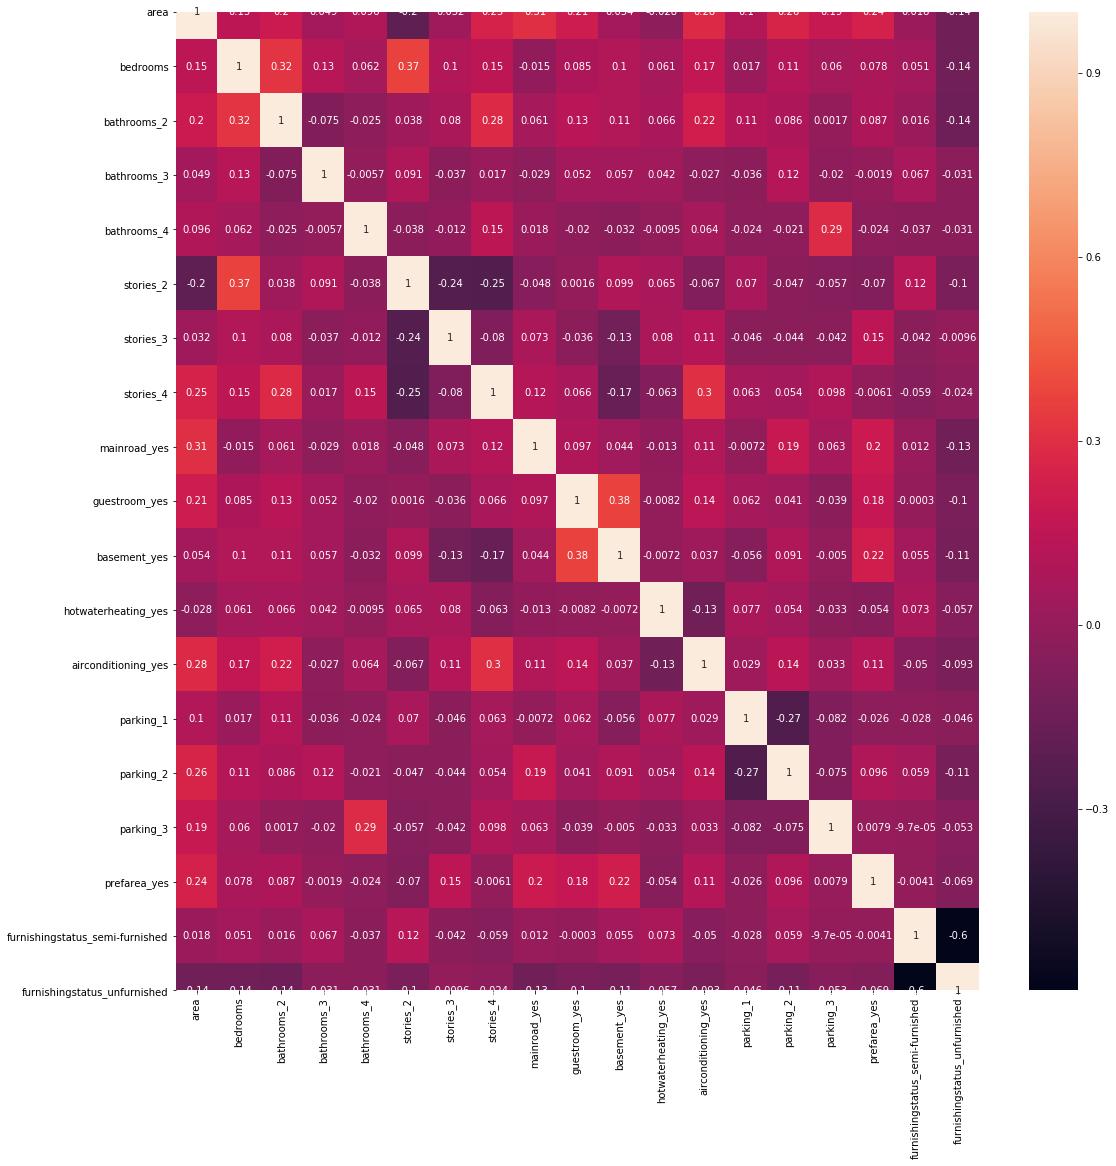

In [52]:
plt.figure(figsize=(18,18))
sns.heatmap(X.corr(),annot=True)

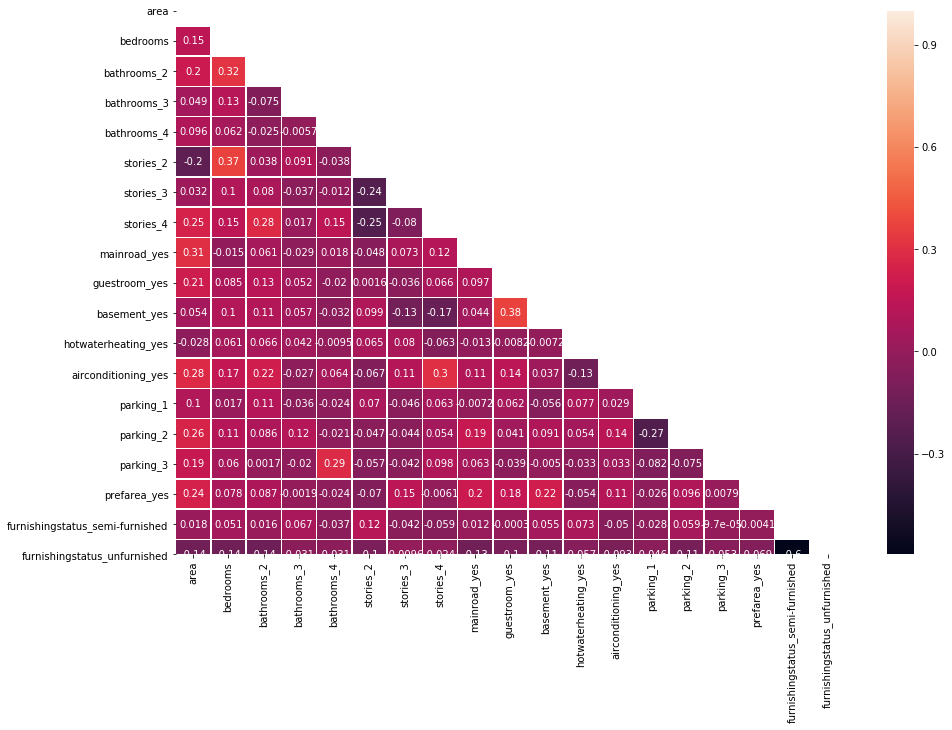

In [54]:
plt.figure(figsize=(15,10))
corr = X.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,mask=mask, linewidth=0.5,annot=True)
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns).T

,area,bedrooms,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
vif,11.776996,15.207907,1.699438,1.07763,1.123595,2.930312,1.425128,1.635555,6.88703,1.533724,2.069996,1.119278,1.848072,1.54245,1.604461,1.202437,1.517938,2.495394,2.137385


In [60]:
X=X.drop('bedrooms',axis=1)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns).T

,area,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
vif,9.051496,1.657857,1.07486,1.122482,2.026944,1.306,1.579222,6.637996,1.530278,2.00069,1.117848,1.845605,1.54204,1.603803,1.20236,1.515384,2.312054,1.886699


In [62]:
X=X.drop('area',axis=1)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns).T

,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
vif,1.635328,1.071082,1.119645,2.026686,1.303319,1.568413,1.981011,1.505343,1.994058,1.117803,1.771724,1.440329,1.516337,1.153382,1.489694,2.087786,1.675157


In [64]:
X_constant=sm.add_constant(X)
ols=sm.OLS(y,X_constant).fit()

ols.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     52.33
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          3.43e-100
Time:                        17:03:55   Log-Likelihood:                -8134.1
No. Observations:                 530   AIC:                         1.630e+04
Df Residuals:                     512   BIC:                         1.638e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              2.7e+06   1.87e+05     14.405      0.000    2.33e+06    3.07e+06
bathrooms_2                      1.044e+06   1.28e+05      8.153      0.000    7.92e+05     1.3e+06
bathrooms_3                      2.125e+06   3.93e+05      5.408      0.000    1.35e+06     2.9e+06
bathrooms_4                      5.703e+06   1.21e+06      4.730      0.000    3.33e+06    8.07e+06
stories_2                        2.635e+05   1.11e+05      2.376      0.018    4.57e+04    4.81e+05
stories_3                        9.143e+05   2.13e+05      4.290      0.000    4.96e+05    1.33e+06
stories_4                        1.573e+06   2.23e+05      7.045      0.000    1.13e+06    2.01e+06
mainroad_yes                     6.191e+05   1.49e+05      4.164      0.000    3.27e+05    9.11e+05
guestroom_yes                    4.328e+05   1.43e+05      3.034      0.003    1.53e+05    7.13e+05
basement_yes                     3.364e+05    1.2e+05      2.799      0.005       1e+05    5.73e+05
hotwaterheating_yes              8.014e+05   2.46e+05      3.259      0.001    3.18e+05    1.28e+06
airconditioning_yes              9.741e+05   1.18e+05      8.257      0.000    7.42e+05    1.21e+06
parking_1                        5.688e+05   1.27e+05      4.475      0.000    3.19e+05    8.18e+05
parking_2                        9.253e+05   1.39e+05      6.678      0.000    6.53e+05     1.2e+06
parking_3                        6.808e+05   3.54e+05      1.924      0.055   -1.42e+04    1.38e+06
prefarea_yes                     8.242e+05   1.26e+05      6.522      0.000    5.76e+05    1.07e+06
furnishingstatus_semi-furnished -2.038e+04   1.28e+05     -0.159      0.874   -2.72e+05    2.31e+05
furnishingstatus_unfurnished    -4.763e+05   1.37e+05     -3.475      0.001   -7.46e+05   -2.07e+05
==============================================================================
Omnibus:                      126.528   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.933
Skew:                           1.090   Prob(JB):                     3.94e-92
Kurtosis:                       6.782   Cond. No.                         40.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import warnings

In [67]:
X_constant=sm.add_constant(X_train)
ols=sm.OLS(y_train,X_constant).fit()

ols.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     35.34
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           1.26e-65
Time:                        17:07:11   Log-Likelihood:                -5701.4
No. Observations:                 371   AIC:                         1.144e+04
Df Residuals:                     353   BIC:                         1.151e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2.737e+06   2.38e+05     11.511      0.000    2.27e+06    3.21e+06
bathrooms_2                      1.109e+06   1.55e+05      7.165      0.000    8.05e+05    1.41e+06
bathrooms_3                      1.811e+06   6.13e+05      2.953      0.003    6.05e+05    3.02e+06
bathrooms_4                      5.528e+06   1.28e+06      4.322      0.000    3.01e+06    8.04e+06
stories_2                        3.549e+05   1.38e+05      2.574      0.010    8.38e+04    6.26e+05
stories_3                        1.042e+06   2.62e+05      3.980      0.000    5.27e+05    1.56e+06
stories_4                        1.516e+06   2.82e+05      5.385      0.000    9.62e+05    2.07e+06
mainroad_yes                     6.028e+05   1.91e+05      3.158      0.002    2.27e+05    9.78e+05
guestroom_yes                    4.467e+05    1.7e+05      2.628      0.009    1.12e+05    7.81e+05
basement_yes                     2.147e+05    1.5e+05      1.434      0.152   -7.97e+04    5.09e+05
hotwaterheating_yes              1.086e+06   3.56e+05      3.050      0.002    3.86e+05    1.79e+06
airconditioning_yes              9.561e+05   1.45e+05      6.586      0.000    6.71e+05    1.24e+06
parking_1                        4.908e+05   1.55e+05      3.158      0.002    1.85e+05    7.96e+05
parking_2                        7.275e+05   1.71e+05      4.256      0.000    3.91e+05    1.06e+06
parking_3                        9.098e+05   4.57e+05      1.989      0.047    1.04e+04    1.81e+06
prefarea_yes                     9.106e+05    1.5e+05      6.075      0.000    6.16e+05    1.21e+06
furnishingstatus_semi-furnished  -9.14e+04   1.57e+05     -0.583      0.560      -4e+05    2.17e+05
furnishingstatus_unfurnished    -4.734e+05    1.7e+05     -2.789      0.006   -8.07e+05    -1.4e+05
==============================================================================
Omnibus:                       99.962   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.671
Skew:                           1.198   Prob(JB):                     5.20e-71
Kurtosis:                       6.899   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X_constant=sm.add_constant(X_test)
ols=sm.OLS(y_test,X_constant).fit()

ols.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     19.60
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           2.26e-28
Time:                        17:08:26   Log-Likelihood:                -2421.3
No. Observations:                 159   AIC:                             4877.
Df Residuals:                     142   BIC:                             4929.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2.649e+06   3.05e+05      8.688      0.000    2.05e+06    3.25e+06
bathrooms_2                      8.978e+05   2.32e+05      3.867      0.000    4.39e+05    1.36e+06
bathrooms_3                      2.207e+06   5.03e+05      4.391      0.000    1.21e+06     3.2e+06
bathrooms_4                      8.245e-12   1.34e-10      0.062      0.951   -2.56e-10    2.73e-10
stories_2                       -4620.5205   1.91e+05     -0.024      0.981   -3.83e+05    3.74e+05
stories_3                        7.361e+05    3.8e+05      1.937      0.055    -1.5e+04    1.49e+06
stories_4                        1.742e+06   3.72e+05      4.688      0.000    1.01e+06    2.48e+06
mainroad_yes                     6.106e+05   2.35e+05      2.595      0.010    1.46e+05    1.08e+06
guestroom_yes                    4.301e+05    2.7e+05      1.594      0.113   -1.03e+05    9.64e+05
basement_yes                     7.218e+05   2.05e+05      3.518      0.001    3.16e+05    1.13e+06
hotwaterheating_yes               5.95e+05   3.45e+05      1.725      0.087    -8.7e+04    1.28e+06
airconditioning_yes              1.097e+06   2.16e+05      5.081      0.000     6.7e+05    1.52e+06
parking_1                        8.002e+05   2.21e+05      3.623      0.000    3.64e+05    1.24e+06
parking_2                        1.341e+06   2.42e+05      5.543      0.000    8.63e+05    1.82e+06
parking_3                        1.963e+05   5.53e+05      0.355      0.723   -8.97e+05    1.29e+06
prefarea_yes                     4.929e+05   2.54e+05      1.941      0.054   -9029.232    9.95e+05
furnishingstatus_semi-furnished   9.76e+04   2.24e+05      0.437      0.663   -3.44e+05    5.39e+05
furnishingstatus_unfurnished    -5.236e+05   2.37e+05     -2.212      0.029   -9.92e+05   -5.56e+04
==============================================================================
Omnibus:                       27.452   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.061
Skew:                           0.643   Prob(JB):                     1.12e-17
Kurtosis:                       6.183   Cond. No.                     6.28e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
result=lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)


print('r_square of train',r2_score(y_train,y_train_pred))
print('r_square of test',r2_score(y_test,y_test_pred))

r_square of train 0.6298711985030946
r_square of test 0.6194549562818865


In [74]:
X1=X.drop(['bathrooms_4','stories_2','parking_3','furnishingstatus_unfurnished'],axis=1)

In [76]:
X_train,X_test,y_train,y_test= train_test_split(X1,y,test_size=0.30,random_state=1)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
result=lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)


print('r_square of train',r2_score(y_train,y_train_pred))
print('r_square of test',r2_score(y_test,y_test_pred))

r_square of train 0.5771293823257537
r_square of test 0.6149070219322486


In [82]:
X2=df1.drop(['price','lprice'],axis=1)
y=df1['price']

In [83]:
X_train,X_test,y_train,y_test= train_test_split(X2,y,test_size=0.30,random_state=1)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
result=lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)


print('r_square of train',r2_score(y_train,y_train_pred))
print('r_square of test',r2_score(y_test,y_test_pred))

r_square of train 0.6857779343786594
r_square of test 0.654402940866438


In [84]:
y=df1['lprice']

In [85]:
X_train,X_test,y_train,y_test= train_test_split(X2,y,test_size=0.30,random_state=1)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
result=lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)


print('r_square of train',r2_score(y_train,y_train_pred))
print('r_square of test',r2_score(y_test,y_test_pred))

r_square of train 0.7030498623858283
r_square of test 0.6745852935779273


In [86]:
X_constant=sm.add_constant(X_train)
ols=sm.OLS(y_train,X_constant).fit()

ols.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     43.74
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           1.83e-80
Time:                        17:17:32   Log-Likelihood:                 65.647
No. Observations:                 371   AIC:                            -91.29
Df Residuals:                     351   BIC:                            -12.97
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              14.5739      0.067    218.584      0.000      14.443      14.705
area                             5.994e-05   7.43e-06      8.068      0.000    4.53e-05    7.46e-05
bedrooms                            0.0249      0.019      1.316      0.189      -0.012       0.062
bathrooms_2                         0.1687      0.028      5.969      0.000       0.113       0.224
bathrooms_3                         0.2681      0.111      2.425      0.016       0.051       0.486
bathrooms_4                         0.5693      0.228      2.494      0.013       0.120       1.018
stories_2                           0.0776      0.029      2.690      0.007       0.021       0.134
stories_3                           0.2096      0.048      4.348      0.000       0.115       0.304
stories_4                           0.2505      0.052      4.849      0.000       0.149       0.352
mainroad_yes                        0.1244      0.035      3.582      0.000       0.056       0.193
guestroom_yes                       0.0571      0.031      1.866      0.063      -0.003       0.117
basement_yes                        0.0649      0.027      2.422      0.016       0.012       0.118
hotwaterheating_yes                 0.1838      0.063      2.901      0.004       0.059       0.308
airconditioning_yes                 0.1635      0.026      6.255      0.000       0.112       0.215
parking_1                           0.0526      0.028      1.866      0.063      -0.003       0.108
parking_2                           0.0725      0.031      2.317      0.021       0.011       0.134
parking_3                           0.0027      0.083      0.033      0.974      -0.160       0.166
prefarea_yes                        0.1383      0.027      5.113      0.000       0.085       0.192
furnishingstatus_semi-furnished     0.0252      0.028      0.900      0.369      -0.030       0.080
furnishingstatus_unfurnished       -0.0934      0.030     -3.078      0.002      -0.153      -0.034
==============================================================================
Omnibus:                        2.071   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.852
Skew:                          -0.107   Prob(JB):                        0.396
Kurtosis:                       3.272   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
X3=X2.drop(['parking_3','furnishingstatus_semi-furnished'],axis=1)

In [91]:
X_train,X_test,y_train,y_test= train_test_split(X3,y,test_size=0.30,random_state=1)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
result=lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)


print('r_square of train',r2_score(y_train,y_train_pred))
print('r_square of test',r2_score(y_test,y_test_pred))

r_square of train 0.7023641083627157
r_square of test 0.6746576967054032


In [92]:
X_constant=sm.add_constant(X_train)
ols=sm.OLS(y_train,X_constant).fit()

ols.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     49.00
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           5.54e-82
Time:                        17:20:28   Log-Likelihood:                 65.220
No. Observations:                 371   AIC:                            -94.44
Df Residuals:                     353   BIC:                            -23.95
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           14.5959      0.062    236.102      0.000      14.474      14.718
area                          5.982e-05   7.29e-06      8.205      0.000    4.55e-05    7.42e-05
bedrooms                         0.0241      0.019      1.278      0.202      -0.013       0.061
bathrooms_2                      0.1682      0.028      5.970      0.000       0.113       0.224
bathrooms_3                      0.2686      0.110      2.434      0.015       0.052       0.486
bathrooms_4                      0.5580      0.215      2.592      0.010       0.135       0.981
stories_2                        0.0792      0.029      2.756      0.006       0.023       0.136
stories_3                        0.2094      0.048      4.365      0.000       0.115       0.304
stories_4                        0.2522      0.052      4.893      0.000       0.151       0.354
mainroad_yes                     0.1215      0.034      3.521      0.000       0.054       0.189
guestroom_yes                    0.0561      0.030      1.843      0.066      -0.004       0.116
basement_yes                     0.0646      0.027      2.416      0.016       0.012       0.117
hotwaterheating_yes              0.1882      0.063      2.985      0.003       0.064       0.312
airconditioning_yes              0.1610      0.026      6.212      0.000       0.110       0.212
parking_1                        0.0507      0.028      1.824      0.069      -0.004       0.105
parking_2                        0.0728      0.031      2.367      0.018       0.012       0.133
prefarea_yes                     0.1382      0.027      5.120      0.000       0.085       0.191
furnishingstatus_unfurnished    -0.1098      0.024     -4.530      0.000      -0.157      -0.062
==============================================================================
Omnibus:                        2.530   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                2.356
Skew:                          -0.119   Prob(JB):                        0.308
Kurtosis:                       3.309   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""